In [1]:
import pandas as pd
import json,csv,re,os,sys,glob,dateutil,collections,operator,time
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import mpld3
# mpl.rcParams['axes.titlesize'] = 18
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['legend.fontsize'] = 12
%matplotlib inline

In [2]:
import sys
sys.path.append('/mnt/home/ubuntu/projects/tools/')
from gp_colours import *

In [3]:
#plotColours=[gpBlue,gpDarkBlue,gpRed,'black']
#plotColours=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff53','#a65628','#f781bf','#9999f9']
plotColours=['#1B6E44','#6D1431','#FF5500','#5D6263','#009D97','#c84699','#71be45','#3F8CBC','#FFC200']
plotColours.extend(plotColours)
def colours():
    n=0
    for c in plotColours:
        yield c
    # Give me a new colour, one at a time
coloursClass=colours()
# We need a whole bunch of colours, so repeat them

In [4]:
%run count_stuff_RCN.py

NTWEET 0 0
MENTIONS 5771
	(u'diguinhocoruja', 34)
	(u'justinbieber', 21)
	(u'harry_styles', 15)
	(u'_mikeprado_', 10)
	(u'dvoluntario', 9)
	(u'vocenaosabiaq', 8)
	(u'bandfmoficial', 8)
	(u'louis_tomlinson', 7)
	(u'danilogentili', 6)
	(u'felipeneto', 6)
HASHTAGS 8101
	(u'mtvhottest', 26)
	(u'unaids', 9)
	(u'selenaformmva', 9)
	(u'mileyformmva', 8)
	(u'protejaogol', 8)
	(u'boiola', 7)
	(u'emfamilia', 6)
	(u'superstar', 6)
	(u'teenawardsbrasil2014', 6)
	(u'paniconaband', 6)
TAGGED HASHTAGS 8478
DOMAINS 8322
	(u'instagram.com', 36)
	(u'pairsonnalites-br.blogspot.co.uk', 32)
	(u'4sq.com', 11)
	(u'youtube.com', 10)
	(u'twitter.com', 5)
	(u'g1.globo.com', 4)
	(u'swarmapp.com', 3)
	(u'vine.co', 3)
	(u'38.media.tumblr.com', 2)
	(u'sonoticiaboa.band.uol.com.br', 2)
TOPICS 0
	(u'Discrimination', 7471)
	(u'Prevention', 973)
	(u'Campaign', 24)
	(u'Testing', 19)
TIMES 0
	(u'28 Jun 2014', 251)
	(u'04 Jul 2014', 203)
	(u'08 Jul 2014', 196)
	(u'16 Jun 2014', 185)
	(u'01 Jul 2014', 180)
	(u'17 Jun 2014'

In [11]:
reducedSeries=None
seriesDict={}
totalSeries=None
# Keep hourly/daily series for each topic
# Key is topic, value is series

nError=0

for dir in glob.glob('../data/stream'):
    print dir
    for f in glob.glob(dir+'/Data*json'):

        times=[]
        content=[]
        topics=[]
        # Keep times,content and topic in memory 
        # Only one file at a time
        
        for newline in open(f,'r').read().decode('utf-8').split('\n'):
            tweet=json.loads(newline)
        
            try:
                for topic in tweet['interaction']['tag_tree']['topic']:
                    timeCreated=dateutil.parser.parse(tweet['interaction']['created_at'])
                    tweetContent=tweet['interaction']['content'].encode('utf-8')
                    
                    times.append(timeCreated)
                    content.append(tweetContent)
                    topics.append(topic)
            except:
                topics.append('NaN')
                times.append(dateutil.parser.parse(tweet['interaction']['created_at']))
                content.append(tweet['interaction']['content'].encode('utf-8'))
                nError+=1
            
    
        tempDf=pd.DataFrame(data={'topics':topics,'content':content},index=times)
        # Make a dataframe with contents of this file
    
        topicGroups=tempDf.groupby(topics)
        # Group dataframe by topics

        for topic,topicDf in topicGroups:
            if not topic in seriesDict.keys():
                seriesDict[topic]=topicDf.resample('D',how='count')['content']
                # First time through, add downsampled series
            else:
                seriesDict[topic]=seriesDict[topic].add(topicDf.resample('D',how='count')['content'],fill_value=0)
                # Then add series from each new file to running total
                # If time ranges don't overlap explicitly add a zero
        totalDf=pd.concat([tdf for t,tdf in topicGroups])
        
        if not type(totalSeries)==pd.Series:
            totalSeries=totalDf.resample('D',how='count')['content']
                # First time through, add downsampled series
        else:
            totalSeries=totalSeries.add(totalDf.resample('D',how='count')['content'],fill_value=0)
print 'ERRORS',nError

../data/stream
ERRORS 0


In [12]:
coloursClass=colours()
maxs={}
for a,b in seriesDict.items():
    if not a==u'NaN':
        if True:
            maxs[a]=b.sum()

## All Topics

### Static Version

Discrimination #1B6E44
Prevention #6D1431
Campaign #FF5500
Testing #5D6263


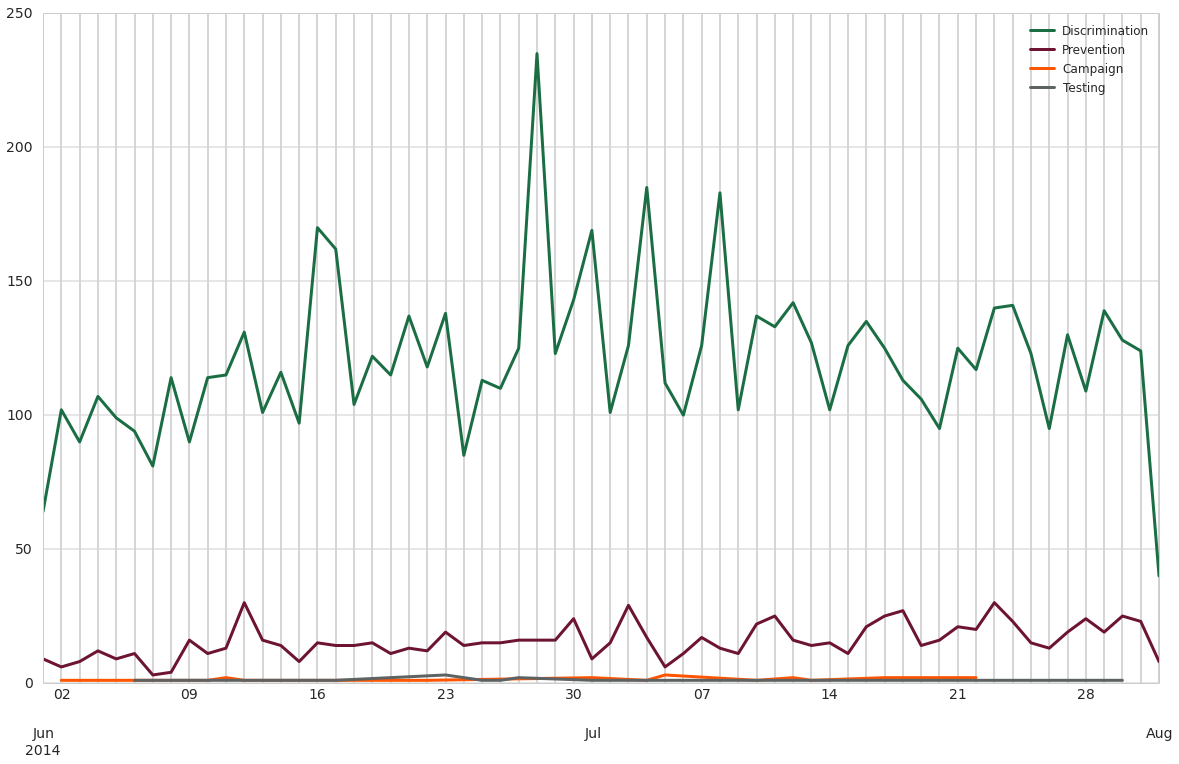

In [13]:
sns.set(context='poster', style='whitegrid', font='Arial', rc={'font.size': 14, 'axes.labelsize': 16, 'legend.fontsize': 12.0, 
                                                               'axes.titlesize': 12, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.despine()
coloursClass=colours()
sortedMaxs=sorted(maxs.iteritems(), key=operator.itemgetter(1))
sortedMaxs.reverse()
for c in sortedMaxs:
    if not c[0]=='NaN':
        a=c[0]
        b=seriesDict[a]
#    if b.max()>100 and b.min()>10:
        if True:
            col=coloursClass.next()
            print a,col
        # Arbitrary threshold 
            ax=b.plot(label=a,legend=True,figsize=(20,12),style=col,lw=3)
            ax.grid(color='lightgray', alpha=0.7)
            xlabels = ax.get_xticklabels()
            ylabels = ax.get_yticklabels()
plt.savefig('../web/charts/PLOT_All.png',dpi=60)

## Interactive Version

In [14]:
coloursClass=colours()
sortedMaxs=sorted(maxs.iteritems(), key=operator.itemgetter(1))
sortedMaxs.reverse()
allSeriesFig, ax = plt.subplots()
for c in sortedMaxs:
    if not c[0]=='NaN':
        a=c[0]
        b=seriesDict[a]
#    if b.max()>100 and b.min()>10:
        if True:
            col=coloursClass.next()
            print a,col
        # Arbitrary threshold 
            ax=b.plot(label=a,legend=True,figsize=(14,8),style=col,lw=3)
            ax.grid(color='lightgray', alpha=0.7)
            xlabels = ax.get_xticklabels()
            ylabels = ax.get_yticklabels()
mpld3.save_html(allSeriesFig, '../web/charts/PLOT_All.php', figid="allSeriesFig")
mpld3.display(allSeriesFig)

Discrimination #1B6E44
Prevention #6D1431
Campaign #FF5500
Testing #5D6263


## Individual Topics

Discrimination #1B6E44 235.0 40.0
Prevention #6D1431 30.0 3.0
Campaign #FF5500 3.0 1.0
Testing #5D6263 3.0 1.0


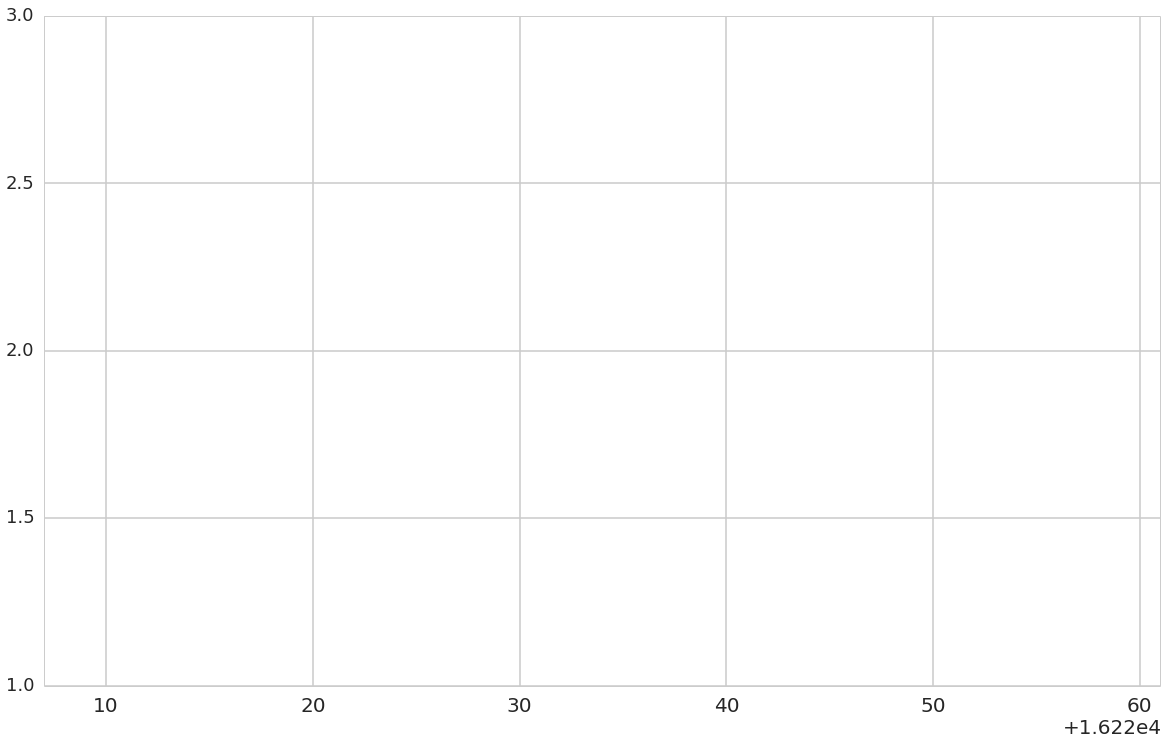

In [31]:
coloursClass=colours()
#for a,b in seriesDict.items():
#for c,d in maxs.items():
#for c in sorted(maxs.iteritems(), key=operator.itemgetter(1)):
for c in sortedMaxs:    
    if not c[0]==u'NaN':
        a=c[0]
        b=seriesDict[a]
        col=coloursClass.next()
        print a,col,b.max(),b.min()
        sns.set(context='poster', style='whitegrid', font='Arial', rc={'font.size': 14, 'axes.labelsize': 16, 'legend.fontsize': 14.0, 
                                                               'axes.titlesize': 12, 'xtick.labelsize': 20, 'ytick.labelsize': 18})
        ax=b.plot(label=a,legend=False,figsize=(20,12),style=col,lw=7)
        xlabels = ax.get_xticklabels()
        ylabels = ax.get_yticklabels()
        plt.savefig('../web/charts/PLOT_'+a.replace('/','_')+'.png',dpi=60)
        plt.cla();

In [16]:
sortedMaxs

[(u'Discrimination', 7471.0),
 (u'Prevention', 973.0),
 (u'Campaign', 24.0),
 (u'Testing', 19.0)]

In [17]:
# ?b.plot

In [18]:
for k,v in sortedMaxs:
    print k,v

Discrimination 7471.0
Prevention 973.0
Campaign 24.0
Testing 19.0


## Total

### Static Version

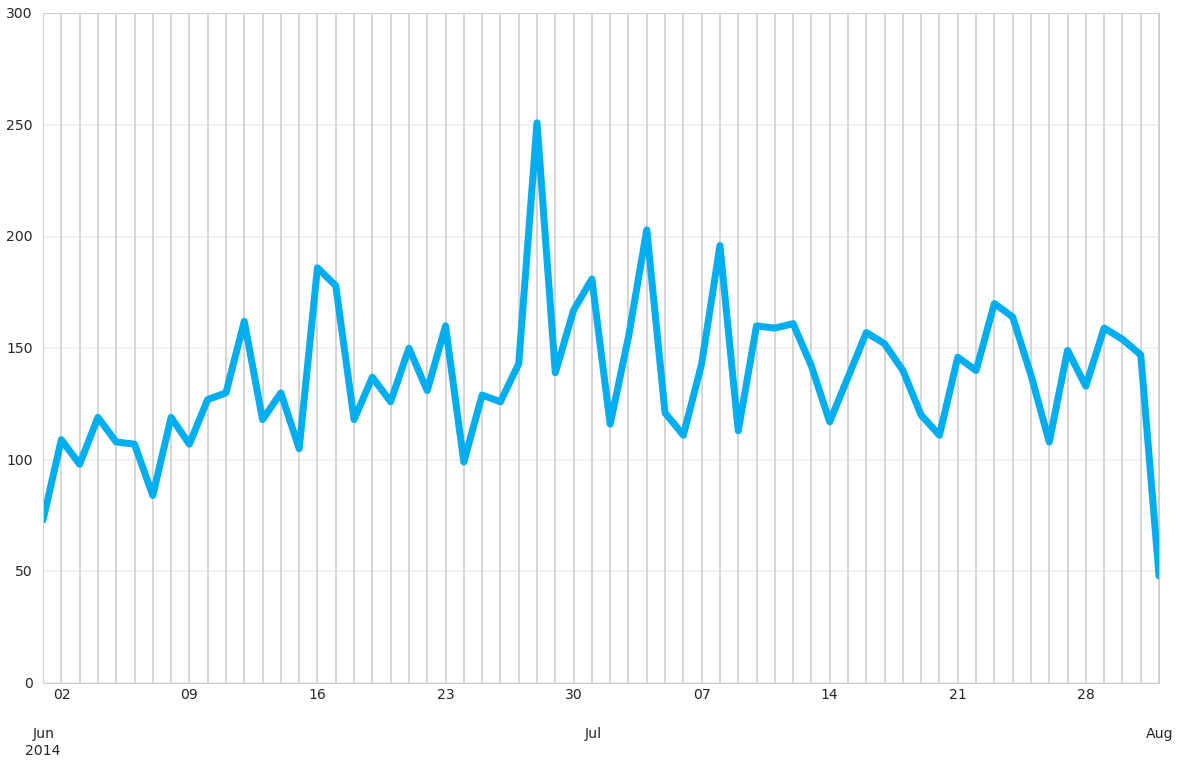

In [19]:
sns.set(context='poster', style='whitegrid', font='Arial', rc={'font.size': 14, 'axes.labelsize': 16, 'legend.fontsize': 14.0, 
                                                               'axes.titlesize': 12, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.despine()
ax=totalSeries.plot(legend=False,figsize=(20,12),style=gpBlue,lw=7)
xlabels = ax.get_xticklabels()
ylabels = ax.get_yticklabels()
ax.grid(color='lightgray', alpha=0.4)
plt.savefig('../web/charts/PLOT_Total.png',dpi=60)

### Interactive Version

In [30]:
sns.set(context='poster', style='whitegrid', font='Arial', rc={'font.size': 14, 'axes.labelsize': 16, 'legend.fontsize': 14.0, 
                                                               'axes.titlesize': 12, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.despine()
rc={'font.size': 14, 'axes.labelsize': 16, 'legend.fontsize': 14.0, 
    'axes.titlesize': 12, 'xtick.labelsize': 14, 'ytick.labelsize': 12}
totalSeriesFig, ax = plt.subplots()
ax=totalSeries.plot(legend=False,figsize=(14,8),style=gpBlue,lw=7)
ax.grid(color='lightgray', alpha=0.4)
plt.savefig('../charts/PLOT_Total.png',dpi=60)
mpld3.save_html(totalSeriesFig, '../web/charts/PLOT_Total.php', figid="totalSeriesFig")
mpld3.display(totalSeriesFig)

In [21]:
from bokeh.plotting import *
import bokeh as bplt


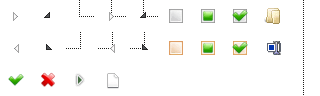
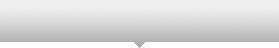
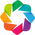
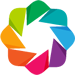

In [22]:
output_notebook()

In [23]:
totalFrame = pd.DataFrame(totalSeries)
totalFrame.head()

,content
2014-06-01 00:00:00+00:00,73
2014-06-02 00:00:00+00:00,109
2014-06-03 00:00:00+00:00,98
2014-06-04 00:00:00+00:00,119
2014-06-05 00:00:00+00:00,108


In [24]:
#reset_output()
output_file("../charts/time.html")
figure(
    title='Number of Tweets',       # Plot title
    title_text_font='Oswald',       # Title font
    title_text_color='#5d6263',     # Title font colour
    plot_width=870,                # Plot width
    plot_height=550,                # Plot height
    background_fill='#f6f6f6',      # Background colour
    border_fill='#f6f6f6',          # Border background
    border_symmetry='hv',           # h=horizontal, v=vertical
    outline_line_color='#f6f6f6',   # Plot area border colour
    x_axis_type = 'datetime',       # For timeseries only
    tools='pan,box_zoom,select,resize,previewsave,embed,reset'
    )
line(
    totalFrame.index,               # x
    totalFrame['content'],          # y
    color='#00aeef',                # Line colour
    line_width=3,                   # Line width in px
    legend='Number of tweets'       # Legend label
    )
legend().label_text_font='Open Sans'
legend().label_text_color='#5d6263'
legend().label_outline_line_color='#f6f6f6'
yaxis().axis_line_color = None
xaxis().axis_line_color = '#d4d4d4'
axis().major_label_text_font="Open Sans"
axis().major_label_text_font_size="12pt"
xgrid().grid_line_color = None
ygrid().grid_line_color = "#d4d4d4"
ygrid().grid_line_width = 1
show()

In [25]:
from ggplot import *

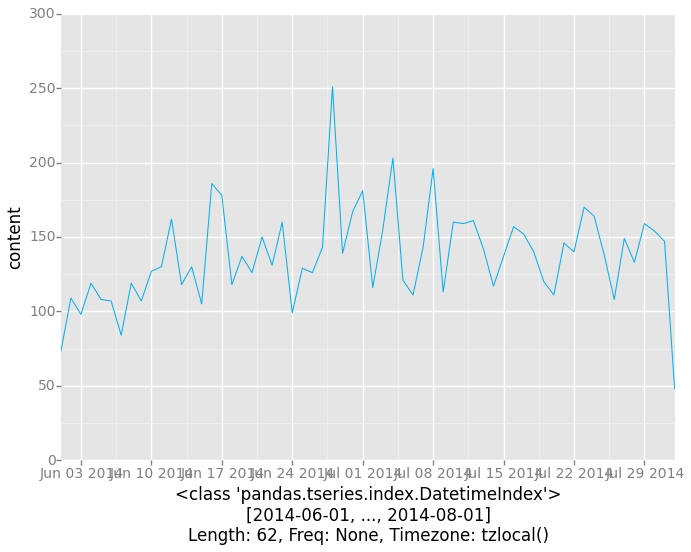

<ggplot: (8729098946837)>

In [26]:
# How to plot a pandas series
ggtime = ggplot(aes(x=totalFrame.index, y='content'), data=totalFrame) + geom_line(colour='#00aeef')
#ggsave(ggtime, "ggtime.png")
ggtime

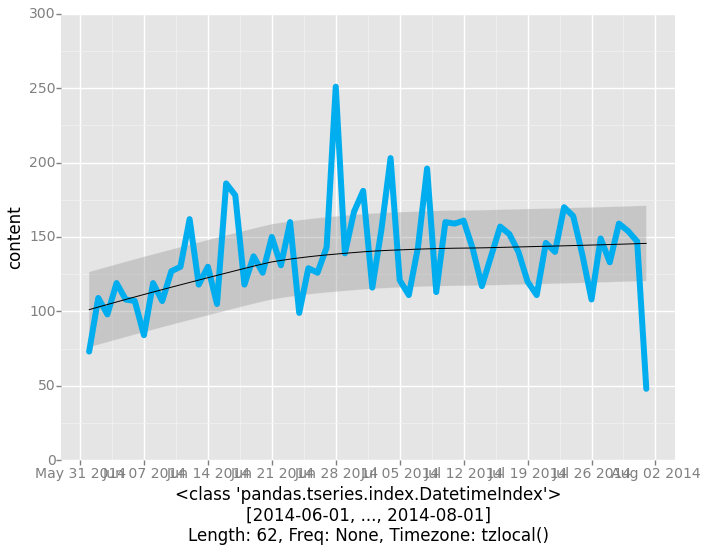

<ggplot: (8729098908721)>

In [27]:
# from bokeh import mpl
ggtime = ggplot(aes(x=totalFrame.index, y='content'), data=totalFrame) +\
    geom_line(colour='#00aeef',size=6) +\
    stat_smooth() + \
    geom_point(alpha=0.3)

# ggsave(ggtime, "../charts/ggtime.png")
# mpl.to_bokeh(name="All_Tweets")
ggtime

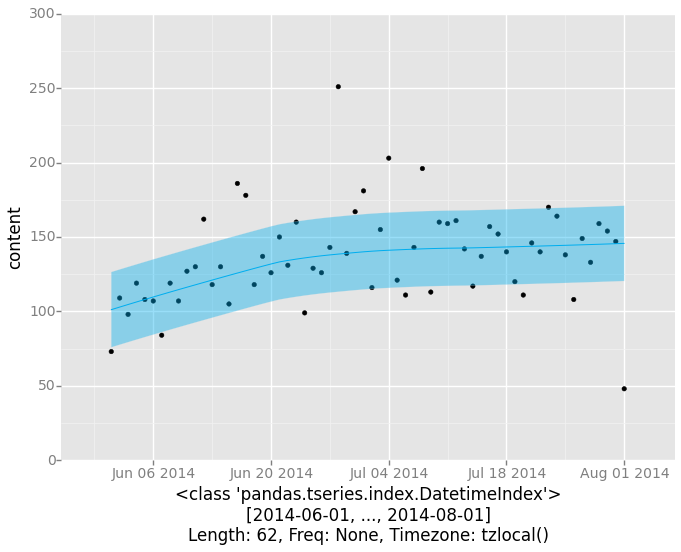

<ggplot: (8729102849481)>

In [28]:
ggplot(aes(x=totalFrame.index, y='content'), data=totalFrame) +\
    geom_point() +\
    stat_smooth(colour='#00aeef',fill='#00aeef') # Using linear smooth

In [29]:
import pickle
if True:
    outFile=open('DUMP.dat','w')
    pickle.dump(seriesDict,outFile)
    pickle.dump(totalSeries,outFile)
    outFile.close()
else:
    inFile=open('DUMP_stuff.dat','r')
    seriesDict=pickle.load(inFile)
    totalSeries=pickle.load(inFile)
    inFile.close()

In [1]:
from IPython.core.display import HTML
styles = open("../css/custom.css", "r").read()
HTML(styles)

In [39]:
pd.set_option('display.max_columns',500)